In [5]:
import_path = './exports/'

In [6]:
import pandas as pd
from sklearn.cluster import DBSCAN, AffinityPropagation, KMeans
import Helpers.helpers as help

def models(): 
    return {
        'KMeans': KMeans(n_clusters=4, init='random', algorithm='lloyd'),
        'AffinityPropagation': AffinityPropagation(damping=0.5, affinity='euclidean'),
        'DBSCAN': DBSCAN(min_samples=6, eps=0.6, metric='euclidean')
    }

In [7]:
epsilons = help.get_experiment_epsilons()
epsilons

[0.05, 0.1, 0.5, 1, 2, 3, 5, 7, 9]

In [8]:
plain_df, perturbed_df = help.load_plain_and_perturbed_dataset(epsilons[0], './export/', './export/')
print(plain_df.shape, perturbed_df.shape)

(200, 3) (200, 3)


In [9]:
supported_models = list(models().values())
print(supported_models)

[KMeans(init='random', n_clusters=4), AffinityPropagation(), DBSCAN(eps=0.6, min_samples=6)]


In [10]:
external_report = help.generate_external_validity_export(epsilons, supported_models, n_times=10, import_path='./export/', perturbed_path='./export/')
external_report.to_csv('./export/results/utility-3d.csv')

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff671ebca0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff671ebca0>
Traceback 

## Report

In [11]:
import Helpers.helpers as help
utility_metrics = help.load_dataset('./export/results/utility-3d.csv')
utility_metrics.head()

,type,epsilon,ari,ami,ch,sc
0,"KMeans(clusters=4, init=random)",0.05,0.000282,0.006377,58.648625,0.237086
1,"AffinityPropagation(damping=0.5, distance_metr...",0.05,-0.001846,0.004600,54.813770,0.256367
2,"DBSCAN(samples=6, distance_metric=euclidean, e...",0.05,0.000339,0.000240,1.939922,0.169719
3,"KMeans(clusters=4, init=random)",0.10,0.006888,0.007490,58.534710,0.259283
4,"AffinityPropagation(damping=0.5, distance_metr...",0.10,0.003347,0.012243,54.551485,0.266227


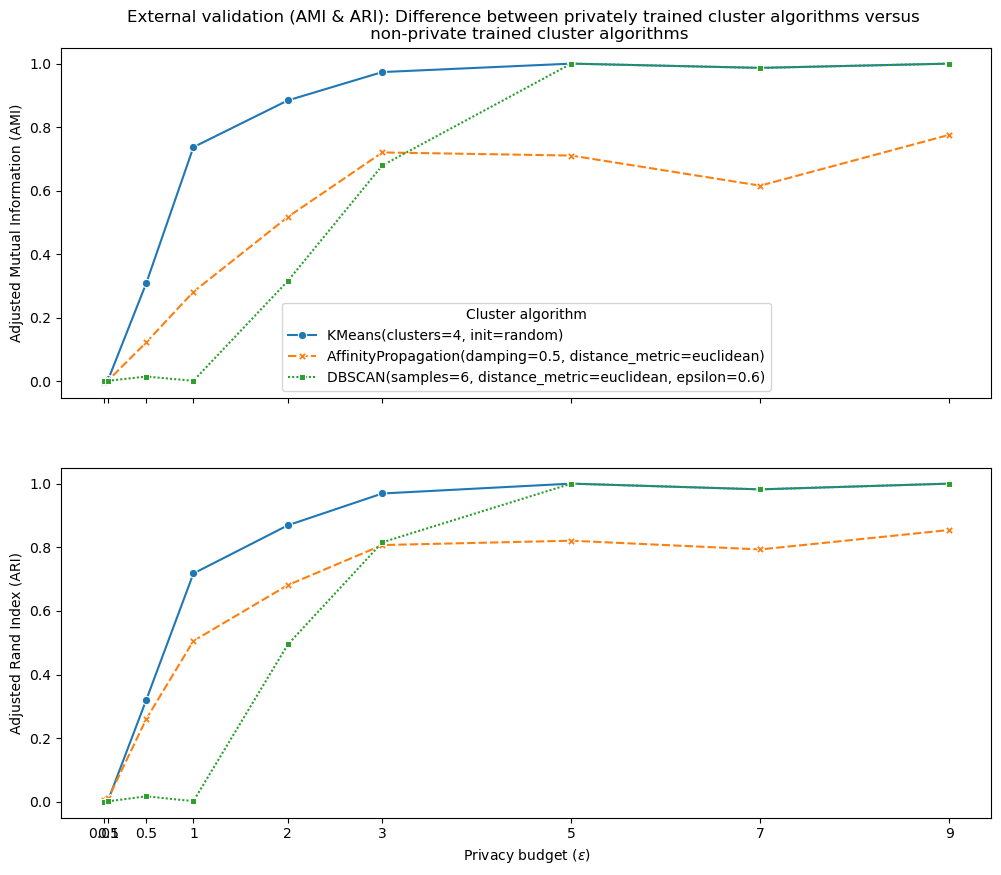

In [12]:
from matplotlib import pyplot as plt
from Helpers import UtilityPlotter
plotter = UtilityPlotter.UtilityPlotter('./export/plain.csv', models())
plotter.plot_external_validation(utility_metrics, export_path='./export/results/', save=True)